In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras import Sequential, regularizers, optimizers
import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input, Resizing, Normalization, LSTM, Reshape, TimeDistributed, BatchNormalization, GlobalAveragePooling2D

In [2]:
x_train = np.load('preprocessed_audio_data/x_train.npy')
x_validation = np.load('preprocessed_audio_data/x_validation.npy')
x_test = np.load('preprocessed_audio_data/x_test.npy')

y_train = np.load('preprocessed_audio_data/y_train.npy')
y_validation = np.load('preprocessed_audio_data/y_validation.npy')
y_test = np.load('preprocessed_audio_data/y_test.npy')

In [3]:
def hybrid_cnn_lstm_model_v2(input_shape, num_labels):
    model = Sequential(name='hybrid_cnn_lstm_model_v2')
    
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.5))
    
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

def small_cnn_lstm(input_shape, num_labels):
    model = Sequential(name='small_cnn_lstm')
    
    model.add(Input(shape=input_shape))
    
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64))
    model.add(Dropout(0.25))
    
    model.add(Dense(num_labels, activation='softmax'))
    
    return model
    
def medium_cnn_lstm(input_shape, num_labels):
    model = Sequential(name='medium_cnn_lstm')
    
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

def large_cnn_lstm(input_shape, num_labels):
    model = Sequential(name='large_cnn_lstm')
    
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))
    
    return model

In [4]:
def train(model, epochs, batch_size, x_train, y_train, x_validation, y_validation):
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=0.0001)
    early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, mode='auto', restore_best_weights=True)

    history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_validation, y_validation),
        callbacks=[early_stopping, reduce_lr],
    )
    return history

In [5]:
sample_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print(sample_shape)

(32, 13, 1)


In [6]:
def plot_training_history(history, model_name):
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')

    plt.figure(figsize=(14, 6))

    plt.suptitle(f'Model Training History: {model_name}', fontsize=16, fontweight='bold', y=1.05)

    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss', color='blue')
    if val_loss is not None:
        plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy', color='blue')
    if val_accuracy is not None:
        plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Epoch 1/100
2679/2679 [==============================] - 37s 13ms/step - loss: 2.8023 - accuracy: 0.2143 - val_loss: 2.1127 - val_accuracy: 0.4232 - lr: 0.0010
Epoch 2/100
2679/2679 [==============================] - 34s 13ms/step - loss: 2.1007 - accuracy: 0.3978 - val_loss: 1.6416 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 3/100
2679/2679 [==============================] - 34s 13ms/step - loss: 1.8002 - accuracy: 0.4823 - val_loss: 1.3997 - val_accuracy: 0.6145 - lr: 0.0010
Epoch 4/100
2679/2679 [==============================] - 34s 13ms/step - loss: 1.6319 - accuracy: 0.5291 - val_loss: 1.2410 - val_accuracy: 0.6490 - lr: 0.0010
Epoch 5/100
2679/2679 [==============================] - 34s 13ms/step - loss: 1.5268 - accuracy: 0.5588 - val_loss: 1.1557 - val_accuracy: 0.6752 - lr: 0.0010
Epoch 6/100
2679/2679 [==============================] - 34s 13ms/step - loss: 1.4496 - accuracy: 0.5820 - val_loss: 1.1092 - val_accuracy: 0.6886 - lr: 0.0010
Epoch 7/100
2679/2679 [=================

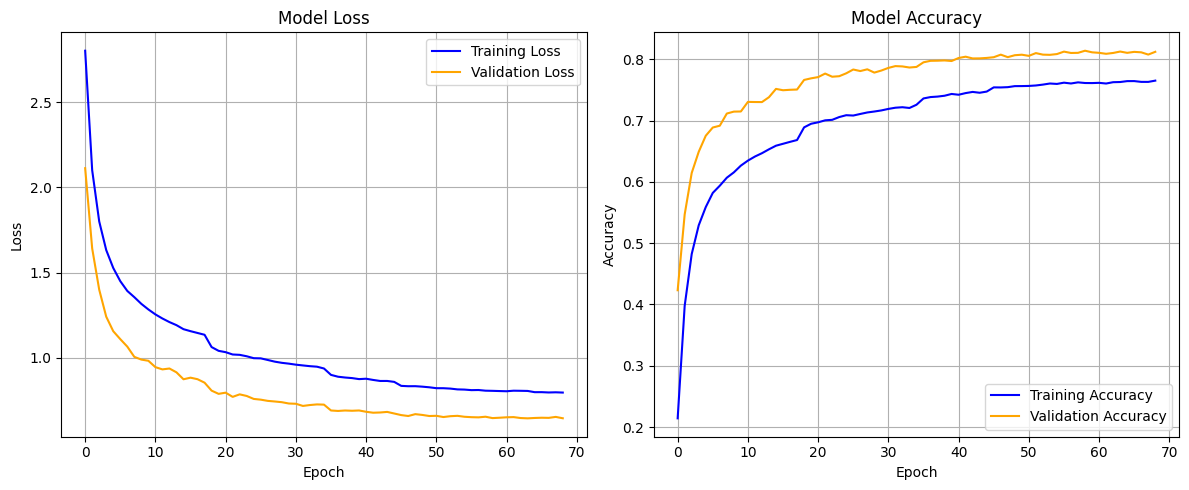

In [7]:
small_model = small_cnn_lstm(sample_shape, 35)
small_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = train(small_model, 100, 32, x_train, y_train, x_validation, y_validation)
test_loss, test_accuracy = small_model.evaluate(x_test, y_test)
small_model.summary()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

plot_training_history(history, small_model.name)

Epoch 1/100
2679/2679 [==============================] - 47s 17ms/step - loss: 2.0612 - accuracy: 0.3906 - val_loss: 0.8038 - val_accuracy: 0.7560 - lr: 0.0010
Epoch 2/100
2679/2679 [==============================] - 45s 17ms/step - loss: 1.1011 - accuracy: 0.6709 - val_loss: 0.5567 - val_accuracy: 0.8301 - lr: 0.0010
Epoch 3/100
2679/2679 [==============================] - 46s 17ms/step - loss: 0.8886 - accuracy: 0.7384 - val_loss: 0.4698 - val_accuracy: 0.8582 - lr: 0.0010
Epoch 4/100
2679/2679 [==============================] - 45s 17ms/step - loss: 0.7808 - accuracy: 0.7716 - val_loss: 0.4043 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 5/100
2679/2679 [==============================] - 44s 17ms/step - loss: 0.7200 - accuracy: 0.7908 - val_loss: 0.3929 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 6/100
2679/2679 [==============================] - 44s 16ms/step - loss: 0.6762 - accuracy: 0.8027 - val_loss: 0.3682 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 7/100
2679/2679 [=================

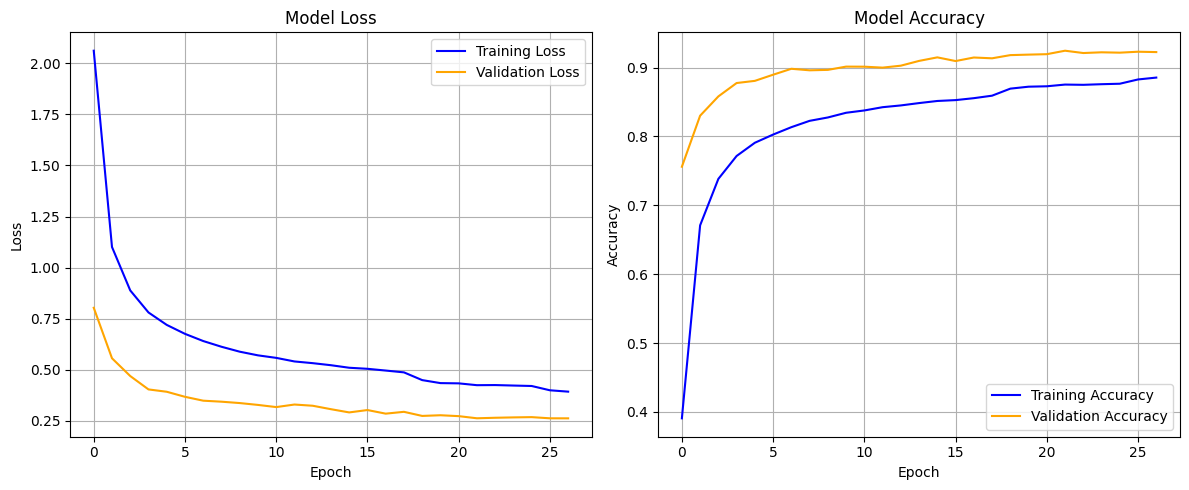

In [8]:
medium_model = medium_cnn_lstm(sample_shape, 35)
medium_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = train(medium_model, 100, 32, x_train, y_train, x_validation, y_validation)
test_loss, test_accuracy = medium_model.evaluate(x_test, y_test)
medium_model.summary()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

plot_training_history(history, small_model.name)

Epoch 1/100
2679/2679 [==============================] - 85s 30ms/step - loss: 1.5646 - accuracy: 0.5387 - val_loss: 0.6479 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 2/100
2679/2679 [==============================] - 81s 30ms/step - loss: 0.9062 - accuracy: 0.7339 - val_loss: 0.5155 - val_accuracy: 0.8476 - lr: 0.0010
Epoch 3/100
2679/2679 [==============================] - 82s 31ms/step - loss: 0.7521 - accuracy: 0.7807 - val_loss: 0.4344 - val_accuracy: 0.8688 - lr: 0.0010
Epoch 4/100
2679/2679 [==============================] - 82s 30ms/step - loss: 0.6724 - accuracy: 0.8029 - val_loss: 0.3968 - val_accuracy: 0.8798 - lr: 0.0010
Epoch 5/100
2679/2679 [==============================] - 82s 30ms/step - loss: 0.6286 - accuracy: 0.8178 - val_loss: 0.3625 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 6/100
2679/2679 [==============================] - 82s 31ms/step - loss: 0.5910 - accuracy: 0.8287 - val_loss: 0.3498 - val_accuracy: 0.8938 - lr: 0.0010
Epoch 7/100
2679/2679 [=================

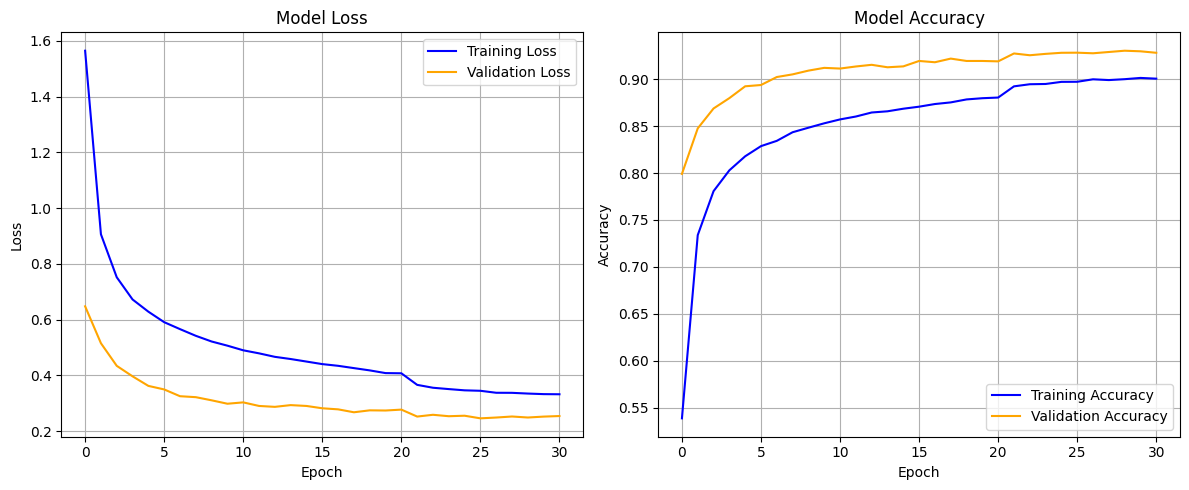

In [9]:
large_model = large_cnn_lstm(sample_shape, 35)
large_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = train(large_model, 100, 32, x_train, y_train, x_validation, y_validation)
test_loss, test_accuracy = large_model.evaluate(x_test, y_test)
large_model.summary()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

plot_training_history(history, small_model.name)

In [10]:
def evaluate_class_accuracy(model, x_test, y_test):
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    
    class_accuracies = {}
    for i in range(cm.shape[0]):
        class_accuracies[i] = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
    
    return class_accuracies

class_accuracies = evaluate_class_accuracy(small_model, x_test, y_test)

for class_index, accuracy in class_accuracies.items():
    print(f'Class {class_index}: {accuracy * 100:.2f}%')


331/331 [==============================] - 2s 5ms/step
Class 0: 76.71%
Class 1: 68.59%
Class 2: 75.90%
Class 3: 74.23%
Class 4: 67.29%
Class 5: 79.83%
Class 6: 91.07%
Class 7: 82.37%
Class 8: 66.24%
Class 9: 52.87%
Class 10: 83.17%
Class 11: 71.58%
Class 12: 81.58%
Class 13: 85.79%
Class 14: 58.06%
Class 15: 83.07%
Class 16: 75.98%
Class 17: 85.28%
Class 18: 76.42%
Class 19: 81.01%
Class 20: 80.31%
Class 21: 89.17%
Class 22: 85.94%
Class 23: 88.65%
Class 24: 85.55%
Class 25: 91.13%
Class 26: 89.36%
Class 27: 84.70%
Class 28: 72.78%
Class 29: 86.97%
Class 30: 80.05%
Class 31: 87.50%
Class 32: 79.03%
Class 33: 92.31%
Class 34: 88.19%
